In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
a=df.isna().sum()
a

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Plot boxplot

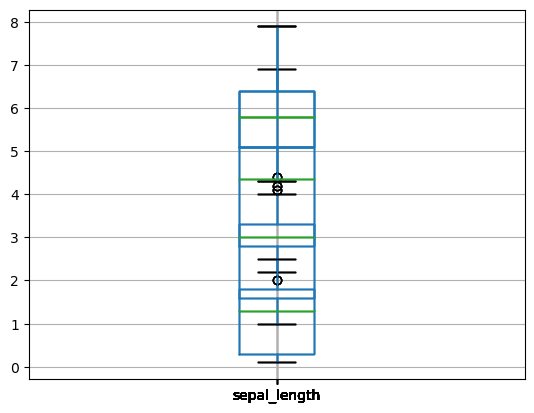

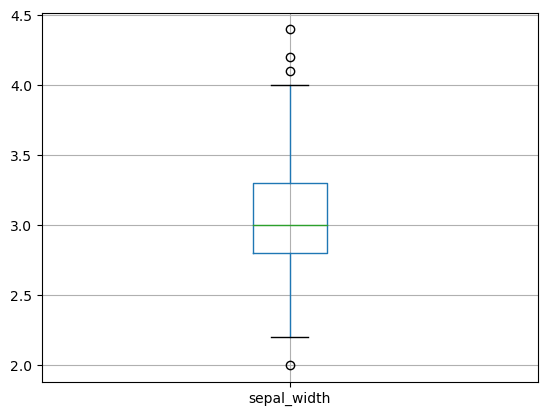

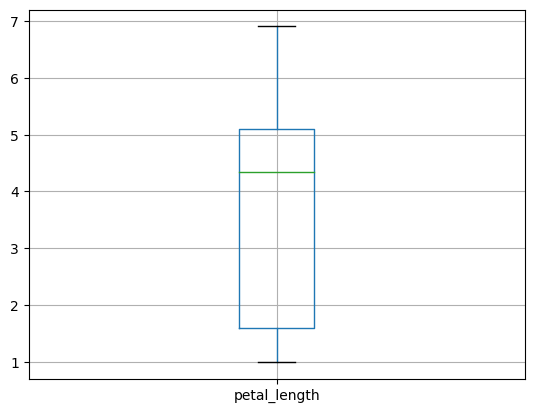

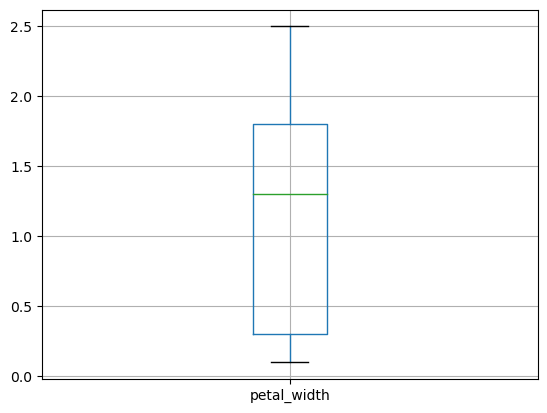

In [19]:
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df.boxplot(column=i)
    plt.show()

# Find ot outliers

In [3]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25) #to set quantille of columns
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1 #to find IQR value
    low_limit=q1-1.5*IQR #setting low limit and upper limit
    upper_limit=q3+1.5*IQR
    return low_limit,upper_limit

outlier={}
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    low_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[low_limit,upper_limit]
outlier

{'sepal_length': [3.1499999999999986, 8.350000000000001],
 'sepal_width': [2.05, 4.05],
 'petal_length': [-3.649999999999999, 10.349999999999998],
 'petal_width': [-1.95, 4.05]}

In [4]:
outindx=[]
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_outl=(df[i]>outlier[i][1])|(df[i]<outlier[i][0])
    x=df.loc[df_outl].index
    outindx.append(x)
outindx

[Int64Index([], dtype='int64'),
 Int64Index([15, 32, 33, 60], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64')]

# Replace outlier with mean

In [5]:
a=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(len(a)):
    df.loc[outindx[i],a[i]]=df[a[i]].mean()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Scaling

In [6]:
df1 = df.drop("species",axis=1)
df1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [8]:
x=scalar.fit_transform(df1)
df2=pd.DataFrame(x,columns=df1.columns)
df2

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.722222,0.067797,0.041667
1,0.166667,0.444444,0.067797,0.041667
2,0.111111,0.555556,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.777778,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667
146,0.555556,0.166667,0.677966,0.750000
147,0.611111,0.444444,0.711864,0.791667
148,0.527778,0.666667,0.745763,0.916667


In [9]:
df.update(df2)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.722222,0.067797,0.041667,Iris-setosa
1,0.166667,0.444444,0.067797,0.041667,Iris-setosa
2,0.111111,0.555556,0.050847,0.041667,Iris-setosa
3,0.083333,0.500000,0.084746,0.041667,Iris-setosa
4,0.194444,0.777778,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,Iris-virginica
146,0.555556,0.166667,0.677966,0.750000,Iris-virginica
147,0.611111,0.444444,0.711864,0.791667,Iris-virginica
148,0.527778,0.666667,0.745763,0.916667,Iris-virginica


# Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()

In [11]:
a=['species']
df[a] = df[a].apply(lenc.fit_transform)
df3=df[a]
df3

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
df.update(df3)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.722222,0.067797,0.041667,0
1,0.166667,0.444444,0.067797,0.041667,0
2,0.111111,0.555556,0.050847,0.041667,0
3,0.083333,0.500000,0.084746,0.041667,0
4,0.194444,0.777778,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,2
146,0.555556,0.166667,0.677966,0.750000,2
147,0.611111,0.444444,0.711864,0.791667,2
148,0.527778,0.666667,0.745763,0.916667,2


# Logistic modelling

In [13]:
x=df.drop('species',axis=1)
y=df['species']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [16]:
x_test.shape

(30, 4)

In [17]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()

In [18]:
logR.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=logR.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
lenc.inverse_transform(y_pred)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [24]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.89      0.94         9\n           2       0.92      1.00      0.96        11\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.96      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

 Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [63]:
cm_df=pd.DataFrame(cm,index=['Iris-setosa','Iris-versicolor','Iris-virginica'],columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])
cm_df

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,10,0,0
Iris-versicolor,0,8,1
Iris-virginica,0,0,11


<function matplotlib.pyplot.show(close=None, block=None)>

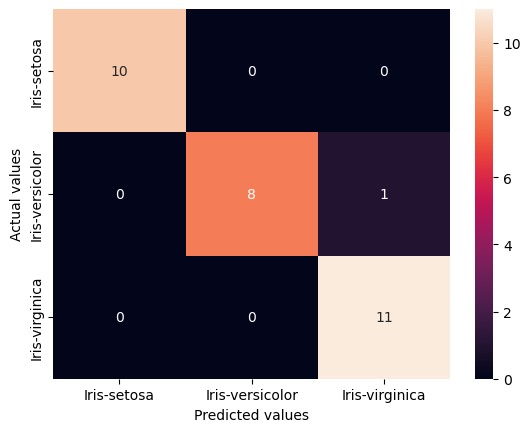

In [39]:
sns.heatmap(cm_df,annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show

# SVM

In [65]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')

In [56]:
svm_radial.fit(x_train,y_train)

SVC(kernel='poly')

In [57]:
svm_radial_pred=svm_radial.predict(x_test)
svm_radial_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0])

In [76]:
classification_report(y_test,svm_radial_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.90      1.00      0.95         9\n           2       1.00      0.91      0.95        11\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [77]:
CM=confusion_matrix(y_test,svm_radial_pred)
CM

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [78]:
DF=pd.DataFrame(CM,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
DF

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,1,10


<function matplotlib.pyplot.show(close=None, block=None)>

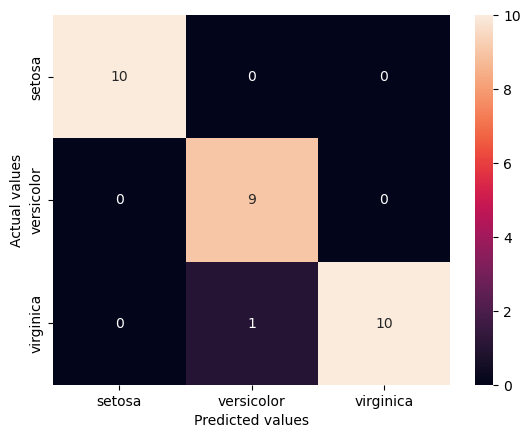

In [79]:
sns.heatmap(DF,annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show

# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtc=DecisionTreeClassifier(criterion="entropy")

In [88]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [89]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [90]:
lenc.inverse_transform(dtc_pred)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [91]:
classification_report(y_test,dtc_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [92]:
dtc_cm=confusion_matrix(y_test,dtc_pred)
dtc_cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [93]:
dtc_df=pd.DataFrame(dtc_cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
dtc_df

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


<function matplotlib.pyplot.show(close=None, block=None)>

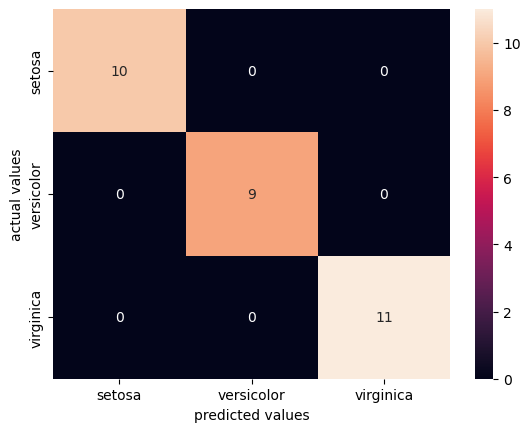

In [94]:
sns.heatmap(dtc_df,annot=True)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show